## Import Libraries and Dataset

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import string
from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


train_data=pd.read_csv('train.csv',encoding='latin1')
test_data=pd.read_csv('test.csv',encoding='latin1')

In [212]:
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [213]:
test_data

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
#Concatenating train and test data for pre processing

df= pd.concat([train_data,test_data])
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [216]:
#Removing missing values

df= df.dropna(how='any')

In [217]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540.0,137.0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054.0,128900.0,81.0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340.0,331.0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160.0,167.0


## Text Pre-Processing

### Clean the text

In [218]:
def clean_text(text):
    
    text = re.sub(r'<.*?>', '', str(text)) # Remove HTML tags
    text = re.sub(r'\s+', ' ', str(text)).strip()  # Remove extra spaces
    text = re.sub(r'http\S+|www\S+', '', str(text))  # Remove URLs
    text = re.sub(r'\S+@\S+', '', str(text))  # Remove emails
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Remove punctuations
    text = re.sub('\n', '', text) #remove newline characters
    text = re.sub('\w*\d\w*', '', text) #remove aplhanumeric words containing digits
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))  # Remove special characters
    text= text.lower() #convert to lower
    
    return text

df['Clean_text'] = df['selected_text'].apply(clean_text)
    

### Tokenization

In [219]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

df['Tokens'] = df['Clean_text'].apply(tokenize_text)

In [220]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Clean_text,Tokens
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,id have responded if i were going,"[id, have, responded, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,sooo sad,"[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,bullying me,"[bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,leave me alone,"[leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,sons of,"[sons, of]"
...,...,...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540.0,137.0,d lost,"[d, lost]"
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054.0,128900.0,81.0,dont force,"[dont, force]"
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340.0,331.0,yay good for both of you,"[yay, good, for, both, of, you]"
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160.0,167.0,but it was worth it,"[but, it, was, worth, it]"


### Removing Stopwords

Stopwords are common words in a language that usually do not add significant meaning to a sentence. These include words like “the”, “is”, “in”, “and”, “of”, “to”, “a”, etc.

In [221]:
stop_words = list(stopwords.words("english"))


def remove_stopwords(tokens):
    
    clean_tokens=[word for word in tokens if word not in stop_words]
    return clean_tokens

df['Clean_tokens']=df['Tokens'].apply(remove_stopwords)

In [222]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Clean_text,Tokens,Clean_tokens
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,id have responded if i were going,"[id, have, responded, if, i, were, going]","[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,sooo sad,"[sooo, sad]","[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,bullying me,"[bullying, me]",[bullying]
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,leave me alone,"[leave, me, alone]","[leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,sons of,"[sons, of]",[sons]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540.0,137.0,d lost,"[d, lost]",[lost]
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054.0,128900.0,81.0,dont force,"[dont, force]","[dont, force]"
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340.0,331.0,yay good for both of you,"[yay, good, for, both, of, you]","[yay, good]"
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160.0,167.0,but it was worth it,"[but, it, was, worth, it]",[worth]


### Lemmatization

In [223]:
def lemmatize(tokens):
    lemma= WordNetLemmatizer()
    lemma_tokens=[lemma.lemmatize(word) for word in tokens]
    return lemma_tokens

df['Lemma_tokens']=df['Clean_tokens'].apply(lemmatize)

In [224]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Clean_text,Tokens,Clean_tokens,Lemma_tokens
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,id have responded if i were going,"[id, have, responded, if, i, were, going]","[id, responded, going]","[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,sooo sad,"[sooo, sad]","[sooo, sad]","[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,bullying me,"[bullying, me]",[bullying],[bullying]
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,leave me alone,"[leave, me, alone]","[leave, alone]","[leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,sons of,"[sons, of]",[sons],[son]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540.0,137.0,d lost,"[d, lost]",[lost],[lost]
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054.0,128900.0,81.0,dont force,"[dont, force]","[dont, force]","[dont, force]"
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340.0,331.0,yay good for both of you,"[yay, good, for, both, of, you]","[yay, good]","[yay, good]"
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160.0,167.0,but it was worth it,"[but, it, was, worth, it]",[worth],[worth]


In [225]:
def final_text(tokens):
    return " ".join(tokens)


df['Processed_text']= df['Lemma_tokens'].apply(final_text)

In [226]:
#getting only the required columns for final modelling
final_df=df[['Processed_text','sentiment']]

In [227]:
final_df

,Processed_text,sentiment
0,id responded going,neutral
1,sooo sad,negative
2,bullying,negative
3,leave alone,negative
4,son,negative
...,...,...
27476,lost,negative
27477,dont force,negative
27478,yay good,positive
27479,worth,positive


In [228]:
def encoding(cat):
    if cat=='negative':
        return 0
    elif cat=='neutral':
        return 1
    elif cat=='positive':
        return 2
    else:
        return -1

final_df['sentiment']=final_df['sentiment'].apply(encoding)

Let's check sentiment distribution

<Axes: ylabel='sentiment'>

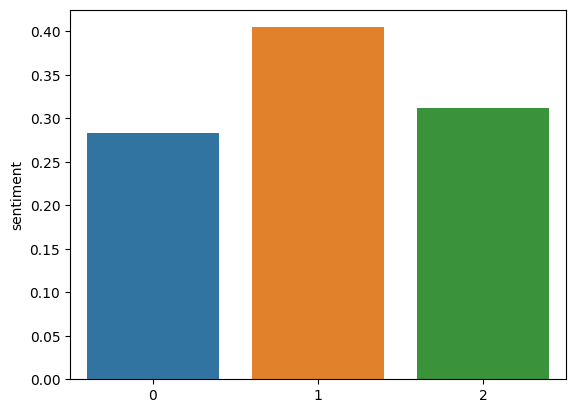

In [229]:
sentiment_dist=pd.DataFrame(final_df['sentiment'].value_counts(normalize=True))

sns.barplot(data=sentiment_dist, y=sentiment_dist['sentiment'], x=sentiment_dist.index)

### Train Test Split

In [230]:
X= final_df['Processed_text']
y= final_df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Creating TFIDF

**Term Frequency-Inverse Document Frequency (TF-IDF)**

Definition

TF-IDF (Term Frequency - Inverse Document Frequency) is a more advanced text representation technique that:

•	Penalizes frequently occurring words (like “the”, “is”, etc.)

•	Gives higher importance to rare but significant words

It consists of two components:

1.	Term Frequency (TF): Measures how often a word appears in a document.

TF = Number of times word appears in a document/Total words in the document

2.	Inverse Document Frequency (IDF): Measures how unique a word is across documents.

IDF = log({Total number of documents}/{Number of documents containing the word})


Final TF-IDF score:

TF-IDF = TF * IDF

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

## Applying different models

### Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(n_jobs=-1)
lr.fit(XV_train, y_train)

LogisticRegression(n_jobs=-1)

In [233]:
lr_pred=lr.predict(XV_test)

In [234]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, lr_pred)
score_lr

0.8042212518195051

In [235]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1572
           1       0.77      0.86      0.81      2236
           2       0.87      0.79      0.83      1688

    accuracy                           0.80      5496
   macro avg       0.81      0.80      0.80      5496
weighted avg       0.81      0.80      0.80      5496



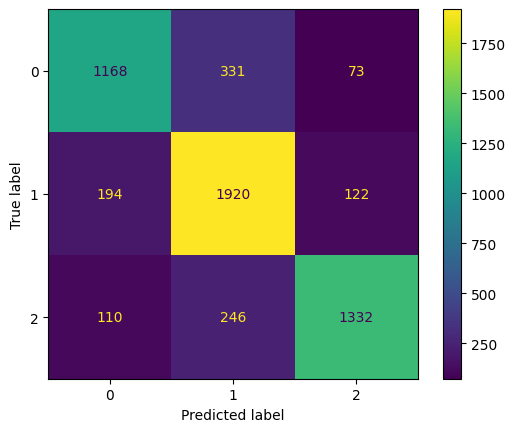

In [236]:
ConfusionMatrixDisplay.from_predictions(y_test,lr_pred)

### DecisionTreeClassifier

In [237]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(XV_train,y_train)

dt_predict= dt.predict(XV_test)



In [238]:
accuracy_score(y_test, dt_predict)

0.7665574963609898

In [239]:
dt.score(XV_test,y_test)

0.7665574963609898

In [240]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1572
           1       0.78      0.76      0.77      2236
           2       0.82      0.78      0.80      1688

    accuracy                           0.77      5496
   macro avg       0.77      0.77      0.77      5496
weighted avg       0.77      0.77      0.77      5496



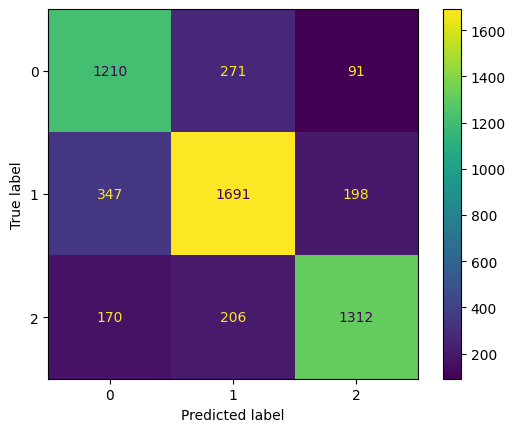

In [241]:
ConfusionMatrixDisplay.from_predictions(y_test,dt_predict)

### Random Forest Classifier

In [242]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [243]:
rfc_pred= rfc.predict(XV_test)

In [244]:
accuracy_score(y_test, rfc_pred)

0.8020378457059679

In [245]:
rfc.score(XV_test, y_test)

0.8020378457059679

In [247]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1572
           1       0.79      0.84      0.81      2236
           2       0.88      0.78      0.82      1688

    accuracy                           0.80      5496
   macro avg       0.81      0.80      0.80      5496
weighted avg       0.81      0.80      0.80      5496



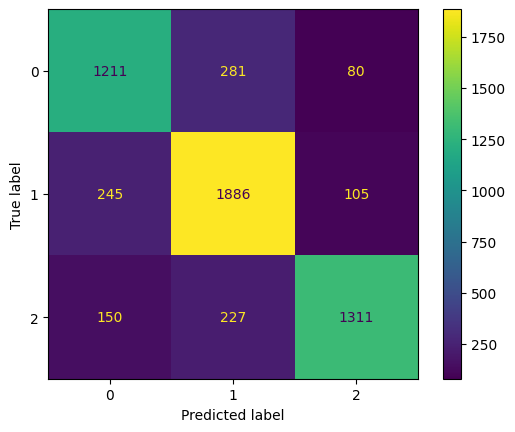

In [248]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred)

### Naive Bayes Classfifcation

In [253]:
from sklearn.naive_bayes import MultinomialNB

nb= MultinomialNB()

nb.fit(XV_train, y_train)

MultinomialNB()

In [254]:
nb_pred=nb.predict(XV_test)

In [255]:
accuracy_score(y_test, nb_pred)

0.7818413391557496

In [256]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72      1572
           1       0.69      0.93      0.79      2236
           2       0.89      0.76      0.82      1688

    accuracy                           0.78      5496
   macro avg       0.83      0.76      0.78      5496
weighted avg       0.81      0.78      0.78      5496



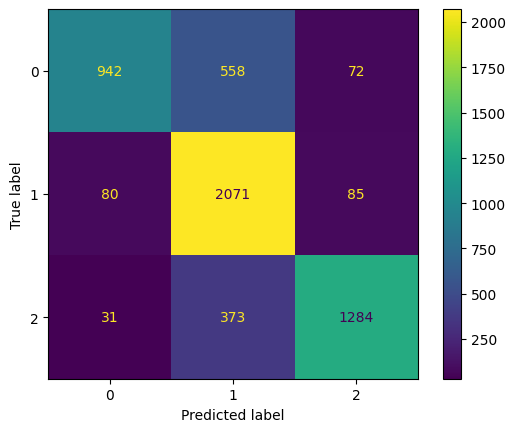

In [257]:
ConfusionMatrixDisplay.from_predictions(y_test,nb_pred)

From above analysis we can see that Logistic Regression performs the best, followed by Random Forest Classifier.